# Cleaning

In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)
%config Completer.use_jedi = True
# sns.set(rc={'figure.figsize':(10,10)})
from sklearn.impute import SimpleImputer
from matplotlib.pyplot import figure

In [189]:
untouched_df = pd.read_excel('data.xlsx')
metro_untouched = pd.read_excel('adressesV1.xlsx')

In [190]:
df = untouched_df
metro = metro_untouched
print('INITIAL LENGTH', len(df))

INITIAL LENGTH 64678


In [191]:
df.head(3)

,ID проекта,ID корпуса,Проект,Локация,Округ,Район,Адрес корпуса,Стадия строительной готовности на дату договора,Заявленный срок ввода в эксплуатацию,Старт продаж,Класс,Девелопер,Дата договора,Месяц и год даты договора,Квартал и год договора,Год договора,Дата регистрации,Месяц и год даты регистрации,Квартал и год регистрации,Год регистрации,Тип сделки,ID лота,Тип объекта,Секция,Этаж,"Количество комнат в прайс-листе, типология bnmap.pro",Площадь согласно ПД,Цена за кв. метр,Метод определения цены,Расчетный бюджет объекта,Включение скидок/акций в ценообразование,Скидки по дате договора,Отделка по корпусу,Тип продавца,Тип покупателя,Кол-во покупателей,Тип ипотеки,Кол-во месяцев обременения,Участие объекта в оптовой сделке,"Срок в экспозиции до момента сделки, дней",Рост цены за 1 кв.м за период экспонирования,Рост бюджета покупки за период экспонирования
0,9a80461dd54fbcef2ac42a6b78af0c3a,2a3a5563a920d27ca7d1acbf4afa87bd,Баркли Медовая Долина,Новая Москва,НАО,НАО,"Крекшино, д. 9 (3 оч.)",Строительство не начато,2020-06-30,2017-05-01,Комфорт,Barkli,2019-01-01,1.2019,1кв. 2019,2019,2019-02-18,2019-02-01,1кв. 2019,2019,Договор участия,efad7e1a12462258b1111dc006cb76e5,квартира,NaN,5,ст,27.43,95325.34,Прайс совпадение площади,2.614774e+06,без скидки,Скидка 12% на ограниченный пул квартир. Скидка...,С отделкой,ЮЛ,ФЛ,1,Нет,NaN,Нет,н/д,н/д,н/д
1,c995291bb13726dbaf1e579cea7680c3,ac46a131b160a231a148cda32fe3cdee,Румянцево-Парк,Новая Москва,НАО,НАО,"Московский п., в районе Румянцево дер., уч. 17...",Монтажные и отделочные работы,2020-06-30,2018-04-01,Комфорт,Lexion Development,2019-01-01,1.2019,1кв. 2019,2019,2019-05-08,2019-05-01,2кв. 2019,2019,Договор участия,8049f8214898fdf4ba8991e54d880a18,квартира,4.0,11,2,62.60,114000.00,Прайс совпадение площади,7.136400e+06,без скидки,Скидка 2% при 100% оплате или ипотеке. При еди...,Без отделки,ЮЛ,ФЛ,1,Нет,NaN,Нет,211,"7,5%","7,5%"
2,c995291bb13726dbaf1e579cea7680c3,ac46a131b160a231a148cda32fe3cdee,Румянцево-Парк,Новая Москва,НАО,НАО,"Московский п., в районе Румянцево дер., уч. 17...",Монтажные и отделочные работы,2020-06-30,2018-04-01,Комфорт,Lexion Development,2019-01-01,1.2019,1кв. 2019,2019,2019-05-08,2019-05-01,2кв. 2019,2019,Договор участия,b4aaa625763725a4ce03aa28b607df2f,квартира,13.0,22,ст,24.10,143000.00,Прайс совпадение площади,3.446300e+06,без скидки,Скидка 2% при 100% оплате или ипотеке. При еди...,Без отделки,ЮЛ,ФЛ,3,Нет,NaN,Нет,211,"16,3%","16,3%"


In [192]:
df['Район'].value_counts()

НАО                 63927
ТАО                   748
Одинцовский г.о.        3
Name: Район, dtype: int64

In [193]:
df = df.drop(['ID проекта', 'ID корпуса', 'Локация', 'ID лота', 'Расчетный бюджет объекта', 'Кол-во месяцев обременения', 'Рост бюджета покупки за период экспонирования', 'Округ', 'Месяц и год даты договора','Месяц и год даты регистрации', 'Проект'], axis=1)

In [194]:
df = df.rename(columns={'Количество комнат в прайс-листе, типология bnmap.pro': 'Количество комнат'})

In [195]:
df.head(3)

,Район,Адрес корпуса,Стадия строительной готовности на дату договора,Заявленный срок ввода в эксплуатацию,Старт продаж,Класс,Девелопер,Дата договора,Квартал и год договора,Год договора,Дата регистрации,Квартал и год регистрации,Год регистрации,Тип сделки,Тип объекта,Секция,Этаж,Количество комнат,Площадь согласно ПД,Цена за кв. метр,Метод определения цены,Включение скидок/акций в ценообразование,Скидки по дате договора,Отделка по корпусу,Тип продавца,Тип покупателя,Кол-во покупателей,Тип ипотеки,Участие объекта в оптовой сделке,"Срок в экспозиции до момента сделки, дней",Рост цены за 1 кв.м за период экспонирования
0,НАО,"Крекшино, д. 9 (3 оч.)",Строительство не начато,2020-06-30,2017-05-01,Комфорт,Barkli,2019-01-01,1кв. 2019,2019,2019-02-18,1кв. 2019,2019,Договор участия,квартира,NaN,5,ст,27.43,95325.34,Прайс совпадение площади,без скидки,Скидка 12% на ограниченный пул квартир. Скидка...,С отделкой,ЮЛ,ФЛ,1,Нет,Нет,н/д,н/д
1,НАО,"Московский п., в районе Румянцево дер., уч. 17...",Монтажные и отделочные работы,2020-06-30,2018-04-01,Комфорт,Lexion Development,2019-01-01,1кв. 2019,2019,2019-05-08,2кв. 2019,2019,Договор участия,квартира,4.0,11,2,62.60,114000.00,Прайс совпадение площади,без скидки,Скидка 2% при 100% оплате или ипотеке. При еди...,Без отделки,ЮЛ,ФЛ,1,Нет,Нет,211,"7,5%"
2,НАО,"Московский п., в районе Румянцево дер., уч. 17...",Монтажные и отделочные работы,2020-06-30,2018-04-01,Комфорт,Lexion Development,2019-01-01,1кв. 2019,2019,2019-05-08,2кв. 2019,2019,Договор участия,квартира,13.0,22,ст,24.10,143000.00,Прайс совпадение площади,без скидки,Скидка 2% при 100% оплате или ипотеке. При еди...,Без отделки,ЮЛ,ФЛ,3,Нет,Нет,211,"16,3%"


In [196]:
df['Стадия строительной готовности на дату договора'].describe()

count                             64678
unique                                7
top       Монтажные и отделочные работы
freq                              35493
Name: Стадия строительной готовности на дату договора, dtype: object

In [197]:
df['Заявленный срок ввода в эксплуатацию'] = pd.to_datetime(df['Заявленный срок ввода в эксплуатацию'], errors='coerce')

In [198]:
df = df.drop('Год договора', axis=1)
df = df.drop('Год регистрации', axis=1)

In [199]:
def split_quater(name):
    quater,year = [],[]
    for i in df[name]:
        quater.append(i.split(' ')[0][0])
        year.append(i.split(' ')[-1])
    return quater, year

In [200]:
df.insert(9, "Квартал договора", split_quater('Квартал и год договора')[0])
df = df.drop('Квартал и год договора', axis=1)
df['Квартал договора'] = df['Квартал договора'].astype(str).astype(int)
df['Дата договора'] = pd.to_datetime(df['Дата договора'])

In [201]:
df.insert(12, "Квартал регистрации", split_quater('Квартал и год регистрации')[0])
df = df.drop('Квартал и год регистрации', axis=1)
df['Квартал регистрации'] = df['Квартал регистрации'].astype(str).astype(int)

In [202]:
print(df['Секция'].isnull().sum())
df['Секция']=df['Секция'].replace(float('nan'),0)
imputer = SimpleImputer(missing_values=0, strategy='mean')
df['Секция'] = imputer.fit_transform(df['Секция'].values.reshape(-1, 1))
df['Секция'] = df['Секция'].astype(int)

4356


In [203]:
print(df['Цена за кв. метр'].isnull().sum())
df = df.dropna(subset = ['Цена за кв. метр'])

907


In [204]:
df['Количество комнат'].value_counts()

1     23297
2     22203
ст     8924
3      8035
4       863
-         4
Name: Количество комнат, dtype: int64

In [205]:
df['Количество комнат'] = df['Количество комнат'].replace('ст','студия')
print(df['Количество комнат'].isnull().sum())
df['Количество комнат'] = df['Количество комнат'].replace(float('nan'),0)
print(df['Количество комнат'].unique())
df = df[df['Количество комнат'] != 0]
df = df[df['Количество комнат'] != 'bez-tipa']
df = df[df['Количество комнат'] != '-']
print(df['Количество комнат'].unique())

445
['студия' '2' '1' '3' 0 '4' '-']
['студия' '2' '1' '3' '4']


In [206]:
df = df.loc[df['Цена за кв. метр']>0]
df = df.loc[df['Площадь согласно ПД']>0]

In [207]:
print(df['Класс'].value_counts())
df['Класс'].replace('Бизнес-', 'Бизнес', inplace=True)
print(df['Класс'].value_counts())

Комфорт    57529
Эконом      4386
Бизнес-      833
Бизнес       292
Name: Класс, dtype: int64
Комфорт    57529
Эконом      4386
Бизнес      1125
Name: Класс, dtype: int64


In [208]:
df.insert(2,'Расстояние до метро', 0)

In [209]:
len(metro['Расстояние до метро'])

366

In [210]:
len(set(df['Адрес корпуса']))

398

29.7761005816732


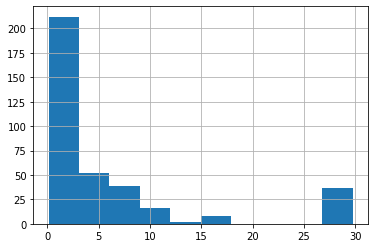

In [211]:
metro['Расстояние до метро'].hist()
print(metro['Расстояние до метро'].max())

In [212]:
d = {}
for i in range(len(metro)):
    d[metro.loc[i, 'Адрес']] = metro.loc[i, 'Расстояние до метро']

In [213]:
df.head(5)

,Район,Адрес корпуса,Расстояние до метро,Стадия строительной готовности на дату договора,Заявленный срок ввода в эксплуатацию,Старт продаж,Класс,Девелопер,Дата договора,Квартал договора,Дата регистрации,Тип сделки,Квартал регистрации,Тип объекта,Секция,Этаж,Количество комнат,Площадь согласно ПД,Цена за кв. метр,Метод определения цены,Включение скидок/акций в ценообразование,Скидки по дате договора,Отделка по корпусу,Тип продавца,Тип покупателя,Кол-во покупателей,Тип ипотеки,Участие объекта в оптовой сделке,"Срок в экспозиции до момента сделки, дней",Рост цены за 1 кв.м за период экспонирования
0,НАО,"Крекшино, д. 9 (3 оч.)",0,Строительство не начато,2020-06-30,2017-05-01,Комфорт,Barkli,2019-01-01,1,2019-02-18,Договор участия,1,квартира,4,5,студия,27.43,95325.34,Прайс совпадение площади,без скидки,Скидка 12% на ограниченный пул квартир. Скидка...,С отделкой,ЮЛ,ФЛ,1,Нет,Нет,н/д,н/д
1,НАО,"Московский п., в районе Румянцево дер., уч. 17...",0,Монтажные и отделочные работы,2020-06-30,2018-04-01,Комфорт,Lexion Development,2019-01-01,1,2019-05-08,Договор участия,2,квартира,4,11,2,62.60,114000.00,Прайс совпадение площади,без скидки,Скидка 2% при 100% оплате или ипотеке. При еди...,Без отделки,ЮЛ,ФЛ,1,Нет,Нет,211,"7,5%"
2,НАО,"Московский п., в районе Румянцево дер., уч. 17...",0,Монтажные и отделочные работы,2020-06-30,2018-04-01,Комфорт,Lexion Development,2019-01-01,1,2019-05-08,Договор участия,2,квартира,13,22,студия,24.10,143000.00,Прайс совпадение площади,без скидки,Скидка 2% при 100% оплате или ипотеке. При еди...,Без отделки,ЮЛ,ФЛ,3,Нет,Нет,211,"16,3%"
3,НАО,"Крекшино, д. 5 (2 оч.)",0,Монтажные и отделочные работы,2019-09-30,2016-08-01,Комфорт,Barkli,2019-01-02,1,2019-10-14,Договор уступки,4,квартира,4,6,студия,28.22,102625.78,Прайс совпадение площади,без скидки,Скидка 12% на ограниченный пул квартир. Скидка...,Без отделки,ЮЛ,ФЛ,1,Ипотека,Нет,н/д,н/д
4,НАО,"Московский п., в районе дер. Саларьево, к. 15",0,Монтажные и отделочные работы,2020-03-31,2018-02-01,Комфорт,ПИК,2019-01-03,1,2019-02-13,Договор участия,1,квартира,1,21,2,51.20,131700.00,Прайс совпадение площади,без скидки,Скидка до 2% при 100% оплате или ипотеке (дейс...,С отделкой,ЮЛ,ФЛ,1,Нет,Нет,275,"15,0%"


In [214]:
for i in range(len(df)):
    try:
        df.loc[i, 'Расстояние до метро'] = round(d[df.loc[i, 'Адрес корпуса']],2)
    except:
        pass
df['Расстояние до метро'].replace(0, np.nan, inplace=True)

In [215]:
df.dropna(inplace=True)
print('FINAL LENGTH', len(df))

FINAL LENGTH 59346


# Anaaaaaalyze

In [216]:
df.head(3)

,Район,Адрес корпуса,Расстояние до метро,Стадия строительной готовности на дату договора,Заявленный срок ввода в эксплуатацию,Старт продаж,Класс,Девелопер,Дата договора,Квартал договора,Дата регистрации,Тип сделки,Квартал регистрации,Тип объекта,Секция,Этаж,Количество комнат,Площадь согласно ПД,Цена за кв. метр,Метод определения цены,Включение скидок/акций в ценообразование,Скидки по дате договора,Отделка по корпусу,Тип продавца,Тип покупателя,Кол-во покупателей,Тип ипотеки,Участие объекта в оптовой сделке,"Срок в экспозиции до момента сделки, дней",Рост цены за 1 кв.м за период экспонирования
0,НАО,"Крекшино, д. 9 (3 оч.)",15.10,Строительство не начато,2020-06-30,2017-05-01,Комфорт,Barkli,2019-01-01,1,2019-02-18,Договор участия,1,квартира,4,5,студия,27.43,95325.34,Прайс совпадение площади,без скидки,Скидка 12% на ограниченный пул квартир. Скидка...,С отделкой,ЮЛ,ФЛ,1,Нет,Нет,н/д,н/д
1,НАО,"Московский п., в районе Румянцево дер., уч. 17...",0.13,Монтажные и отделочные работы,2020-06-30,2018-04-01,Комфорт,Lexion Development,2019-01-01,1,2019-05-08,Договор участия,2,квартира,4,11,2,62.60,114000.00,Прайс совпадение площади,без скидки,Скидка 2% при 100% оплате или ипотеке. При еди...,Без отделки,ЮЛ,ФЛ,1,Нет,Нет,211,"7,5%"
2,НАО,"Московский п., в районе Румянцево дер., уч. 17...",0.13,Монтажные и отделочные работы,2020-06-30,2018-04-01,Комфорт,Lexion Development,2019-01-01,1,2019-05-08,Договор участия,2,квартира,13,22,студия,24.10,143000.00,Прайс совпадение площади,без скидки,Скидка 2% при 100% оплате или ипотеке. При еди...,Без отделки,ЮЛ,ФЛ,3,Нет,Нет,211,"16,3%"


In [217]:
figure(figsize=(2, 3), dpi=100)

<Figure size 200x300 with 0 Axes>

<Figure size 200x300 with 0 Axes>

<AxesSubplot:>

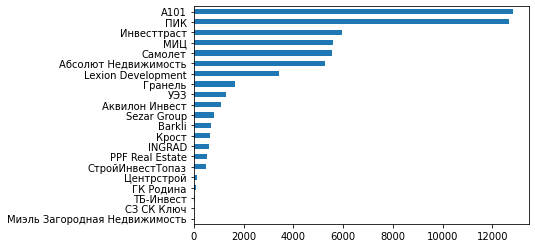

In [218]:
# figure(figsize=(10, 5), dpi=300)
import matplotlib.pyplot as plt
plt.xticks(rotation=0)
df['Девелопер'].value_counts(sort=True, ascending=True).plot.barh()
# plt.savefig(f'developer.jpg', bbox_inches = 'tight', dpi=300)

<AxesSubplot:>

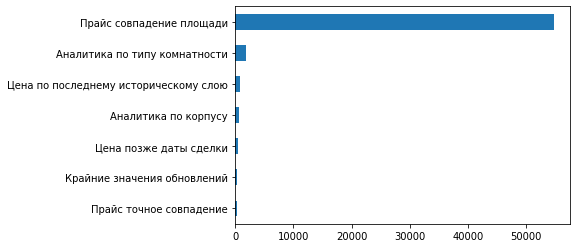

In [219]:
# figure(figsize=(10, 5), dpi=300)

plt.xticks(rotation=0)
df['Метод определения цены'].value_counts(sort=True, ascending=True).plot.barh()
# plt.savefig(f'Метод определения цены.jpg', bbox_inches = 'tight', dpi=300)

<AxesSubplot:>

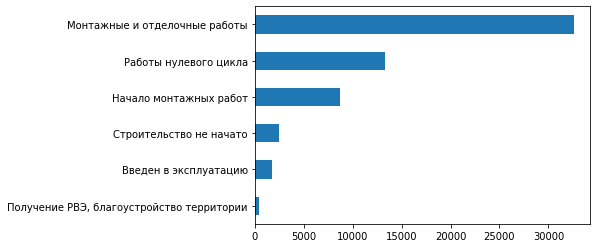

In [220]:
# figure(figsize=(10, 5), dpi=300)

plt.xticks(rotation=0)
df['Стадия строительной готовности на дату договора'].value_counts(sort=True, ascending=True).plot.barh()
# plt.savefig(f'Стадия строительной готовности на дату договора.jpg', bbox_inches = 'tight', dpi=300)

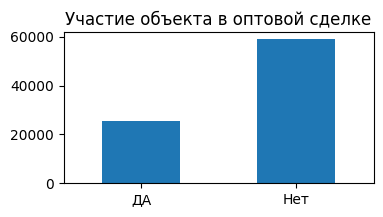

In [221]:
figure(figsize=(4, 2), dpi=100)
for i in ['Район',
        'Класс', 
         'Тип сделки', 'Тип объекта', 'Тип продавца',
       'Тип покупателя', 'Тип ипотеки', 'Участие объекта в оптовой сделке']:
    plt.title(i)
    plot = df[i].value_counts(sort=True, ascending=True).plot.bar()
    
    
#     for bar in plot.patches:
#         plot.annotate(format(bar.get_height(), '.2f'),
#                        (bar.get_x() + bar.get_width() / 2,
#                         bar.get_height()), ha='center', va='center',
#                        size=5, xytext=(0, 3),
#                        textcoords='offset points')
    
    plt.xticks(rotation=0)
#     plt.savefig(f'{i}.jpg', bbox_inches = 'tight', dpi=300)
#     print(plt.show())

## Распределения

<AxesSubplot:>

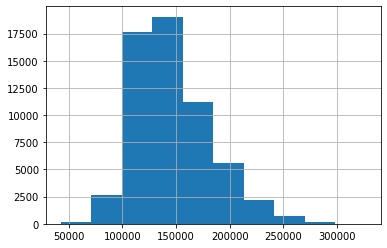

In [222]:
df['Цена за кв. метр'].hist()  
# plt.savefig(f'Цена за кв. метр.jpg', bbox_inches = 'tight', dpi=300)

<AxesSubplot:>

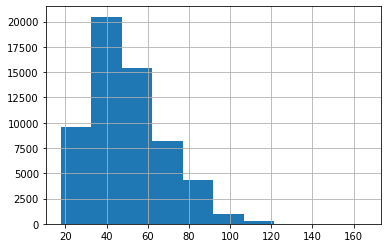

In [223]:
df['Площадь согласно ПД'].hist()
# plt.savefig(f'Площадь.jpg', bbox_inches = 'tight', dpi=300)

<AxesSubplot:>

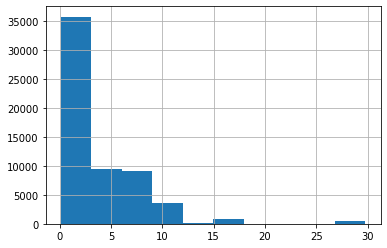

In [224]:
df['Расстояние до метро'].hist()

In [225]:
max(df['Расстояние до метро'])

29.78

## Transforming for ML

In [226]:
label_dict = {}

def label_encode(name):
    df[name] = pd.Categorical(df[name])
    d = dict(enumerate(df[name].cat.categories))
    inverted_d = {v: k for k, v in d.items()}
    print(name, inverted_d.keys())
    df[name] = df[name].cat.codes
    label_dict.update(inverted_d)

In [227]:
df.head(3)

,Район,Адрес корпуса,Расстояние до метро,Стадия строительной готовности на дату договора,Заявленный срок ввода в эксплуатацию,Старт продаж,Класс,Девелопер,Дата договора,Квартал договора,Дата регистрации,Тип сделки,Квартал регистрации,Тип объекта,Секция,Этаж,Количество комнат,Площадь согласно ПД,Цена за кв. метр,Метод определения цены,Включение скидок/акций в ценообразование,Скидки по дате договора,Отделка по корпусу,Тип продавца,Тип покупателя,Кол-во покупателей,Тип ипотеки,Участие объекта в оптовой сделке,"Срок в экспозиции до момента сделки, дней",Рост цены за 1 кв.м за период экспонирования
0,НАО,"Крекшино, д. 9 (3 оч.)",15.10,Строительство не начато,2020-06-30,2017-05-01,Комфорт,Barkli,2019-01-01,1,2019-02-18,Договор участия,1,квартира,4,5,студия,27.43,95325.34,Прайс совпадение площади,без скидки,Скидка 12% на ограниченный пул квартир. Скидка...,С отделкой,ЮЛ,ФЛ,1,Нет,Нет,н/д,н/д
1,НАО,"Московский п., в районе Румянцево дер., уч. 17...",0.13,Монтажные и отделочные работы,2020-06-30,2018-04-01,Комфорт,Lexion Development,2019-01-01,1,2019-05-08,Договор участия,2,квартира,4,11,2,62.60,114000.00,Прайс совпадение площади,без скидки,Скидка 2% при 100% оплате или ипотеке. При еди...,Без отделки,ЮЛ,ФЛ,1,Нет,Нет,211,"7,5%"
2,НАО,"Московский п., в районе Румянцево дер., уч. 17...",0.13,Монтажные и отделочные работы,2020-06-30,2018-04-01,Комфорт,Lexion Development,2019-01-01,1,2019-05-08,Договор участия,2,квартира,13,22,студия,24.10,143000.00,Прайс совпадение площади,без скидки,Скидка 2% при 100% оплате или ипотеке. При еди...,Без отделки,ЮЛ,ФЛ,3,Нет,Нет,211,"16,3%"


In [228]:
# df.info()

In [229]:
label_encode('Район')
label_encode('Тип сделки')
label_encode('Тип объекта')
label_encode('Метод определения цены')
label_encode('Включение скидок/акций в ценообразование')
label_encode('Тип продавца')
label_encode('Тип покупателя')
label_encode('Тип ипотеки')
label_encode('Участие объекта в оптовой сделке')
label_encode('Стадия строительной готовности на дату договора')
label_encode('Класс')
label_encode('Девелопер')
label_encode('Отделка по корпусу')

Район dict_keys(['НАО', 'ТАО'])
Тип сделки dict_keys(['Договор уступки', 'Договор участия'])
Тип объекта dict_keys(['апартаменты', 'квартира'])
Метод определения цены dict_keys(['Аналитика по корпусу', 'Аналитика по типу комнатности', 'Крайние значения обновлений', 'Прайс совпадение площади', 'Прайс точное совпадение', 'Цена по последнему историческому слою', 'Цена позже даты сделки'])
Включение скидок/акций в ценообразование dict_keys(['без скидки', 'со скидкой', 'со скидкой и без скидки'])
Тип продавца dict_keys(['ФЛ', 'ЮЛ'])
Тип покупателя dict_keys(['ФЛ', 'ЮЛ'])
Тип ипотеки dict_keys(['Ипотека', 'Нет'])
Участие объекта в оптовой сделке dict_keys(['ДА', 'Нет'])
Стадия строительной готовности на дату договора dict_keys(['Введен в эксплуатацию', 'Монтажные и отделочные работы', 'Начало монтажных работ', 'Получение РВЭ, благоустройство территории', 'Работы нулевого цикла', 'Строительство не начато'])
Класс dict_keys(['Бизнес', 'Комфорт', 'Эконом'])
Девелопер dict_keys(['Barkli', 'INGRA

In [230]:
df['Количество комнат'] = df['Количество комнат'].replace('студия',0)
df['Количество комнат'] = df['Количество комнат'].astype(str).astype(int)

In [231]:
df = df.drop('Адрес корпуса', axis=1)

In [232]:
# max может влиять на модель, проверить с min
import re
c = 0
discounts = []
df['Скидки по дате договора'] = df['Скидки по дате договора'].replace(float('nan'),'')
for i in df['Скидки по дате договора']:
    found = "".join(re.findall(r'Скидка \d+%|Скидка до \d+%',i))
    if len(found) != 0:
        max_discount = max([int(i) for i in re.findall('[0-9]+',found)])
        discounts.append(max_discount)
    else:
        discounts.append(0)

In [233]:
df['Скидки по дате договора'] = discounts

In [234]:
# н/д в 0 может повлиять на модель!

df['Срок в экспозиции до момента сделки, дней'] = df['Срок в экспозиции до момента сделки, дней'].replace('н/д', 0)
df['Срок в экспозиции до момента сделки, дней'] = df['Срок в экспозиции до момента сделки, дней'].astype(str).astype(int)
df['Срок в экспозиции до момента сделки, дней'] = df['Срок в экспозиции до момента сделки, дней'].abs()

In [235]:
price = df['Рост цены за 1 кв.м за период экспонирования']
price = [float(i.split('%')[0].replace(',','.')) if '%' in i else i for i in price]
df['Рост цены за 1 кв.м за период экспонирования'] = price
df['Рост цены за 1 кв.м за период экспонирования'] = df['Рост цены за 1 кв.м за период экспонирования'].replace('н/д', 0)

In [236]:
df['Старт продаж'][0]

Timestamp('2017-05-01 00:00:00')

In [237]:
df['Заявленный срок ввода в эксплуатацию'][0]

Timestamp('2020-06-30 00:00:00')

In [238]:

df.insert(4, 'Срок ввода в эксплуатацию - Старт продаж' ,(df['Заявленный срок ввода в эксплуатацию'] - df['Старт продаж']).dt.days)


df.insert(8, 'Срок ввода в эксплуатацию - Договор' ,(df['Заявленный срок ввода в эксплуатацию']-df['Дата договора']).dt.days)


df = df.drop(['Заявленный срок ввода в эксплуатацию','Дата договора', 'Старт продаж', 'Дата регистрации'], axis=1)

In [239]:
# df.to_excel('ml.xlsx')

Район


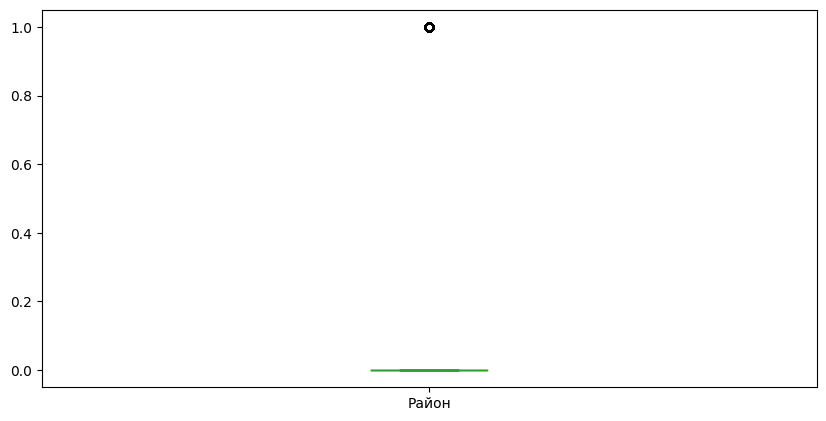

None
Расстояние до метро


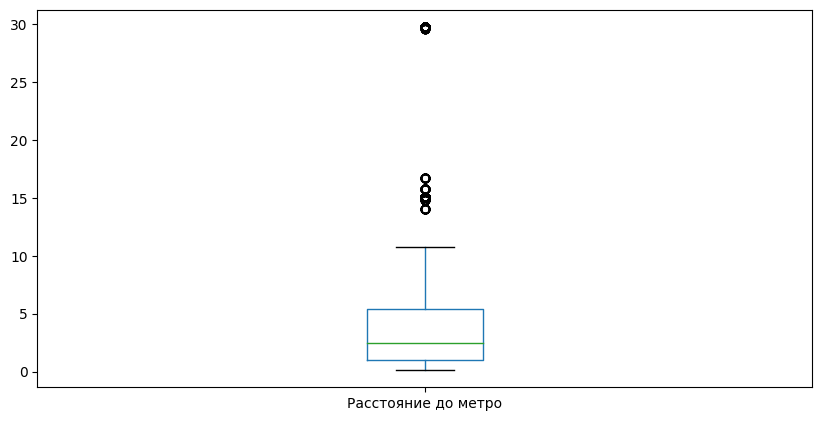

None
Стадия строительной готовности на дату договора


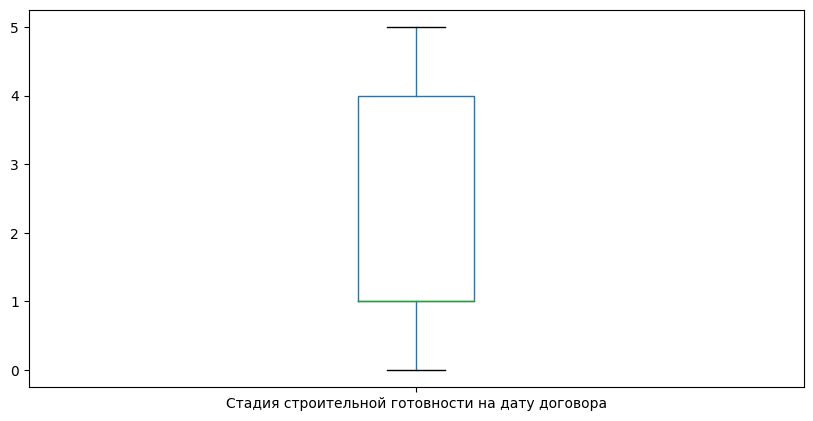

None
Срок ввода в эксплуатацию - Старт продаж


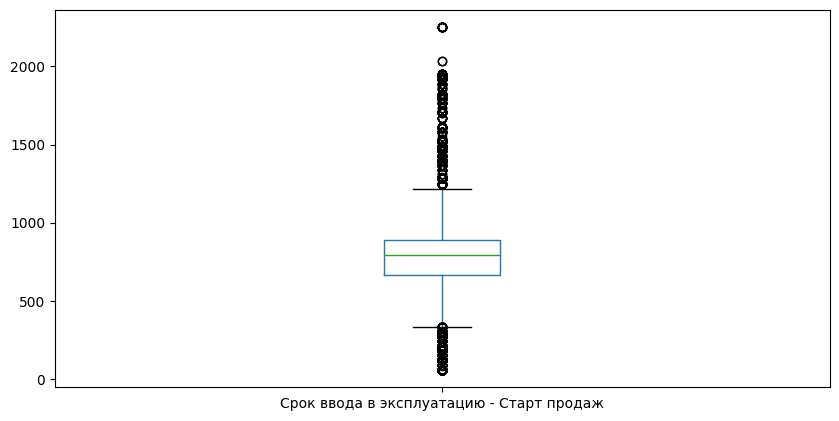

None
Класс


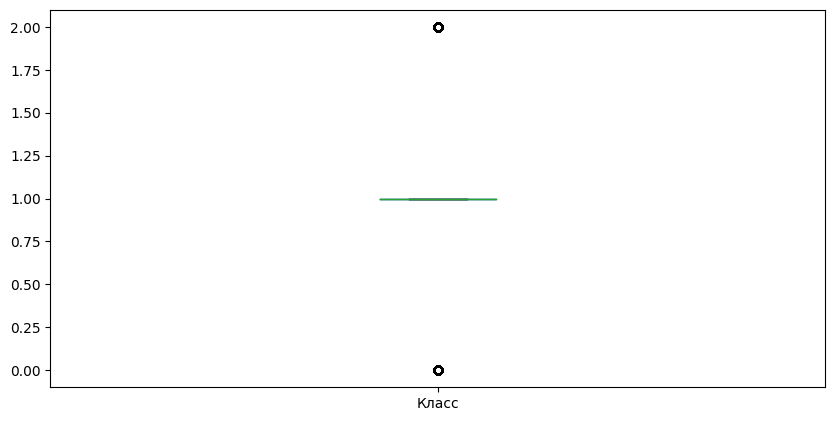

None
Девелопер


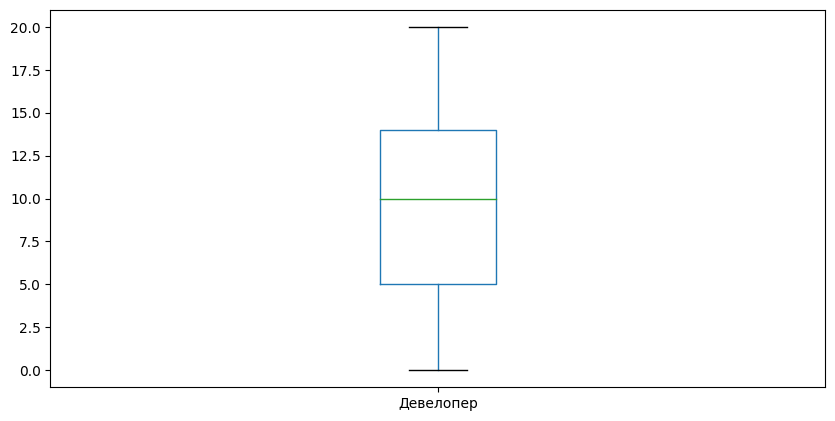

None
Срок ввода в эксплуатацию - Договор


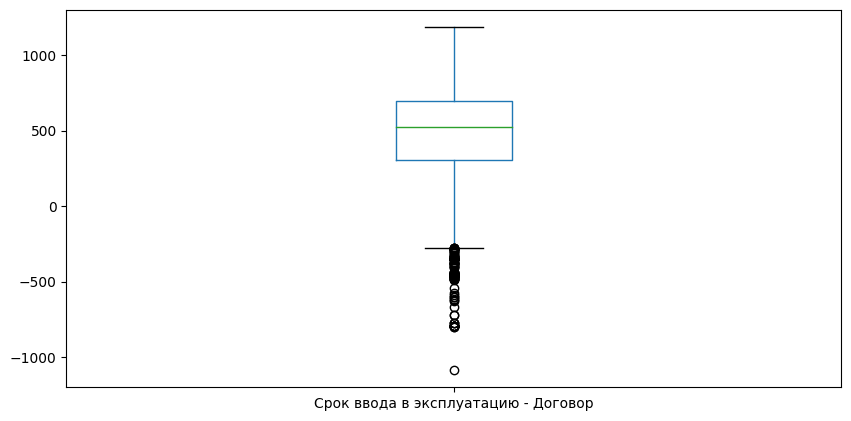

None
Квартал договора


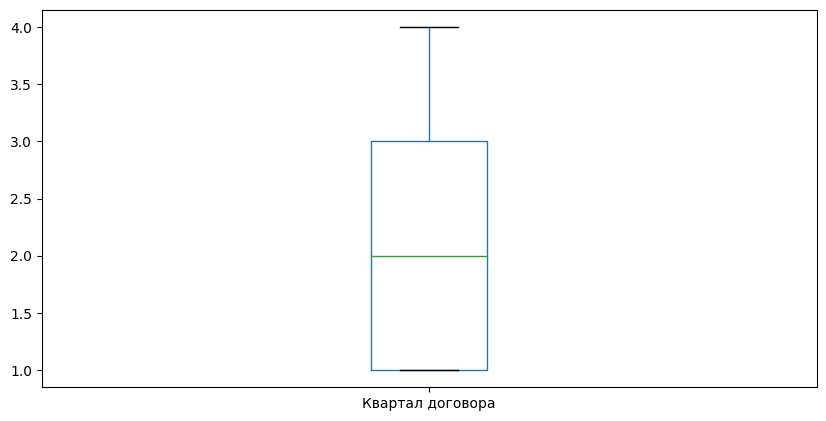

None
Тип сделки


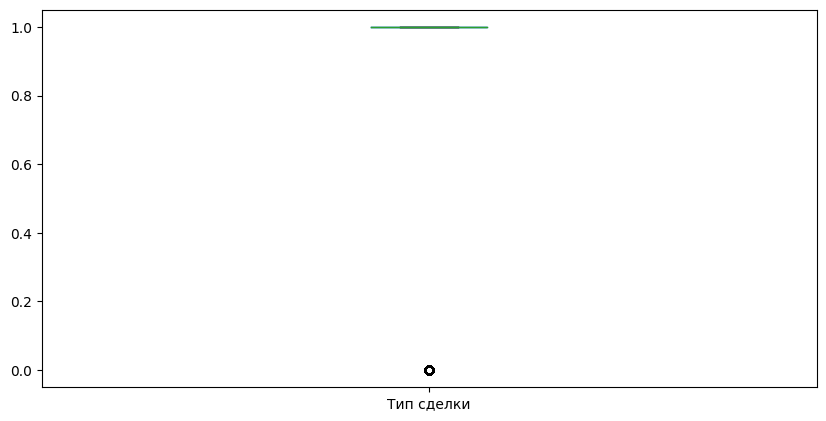

None
Квартал регистрации


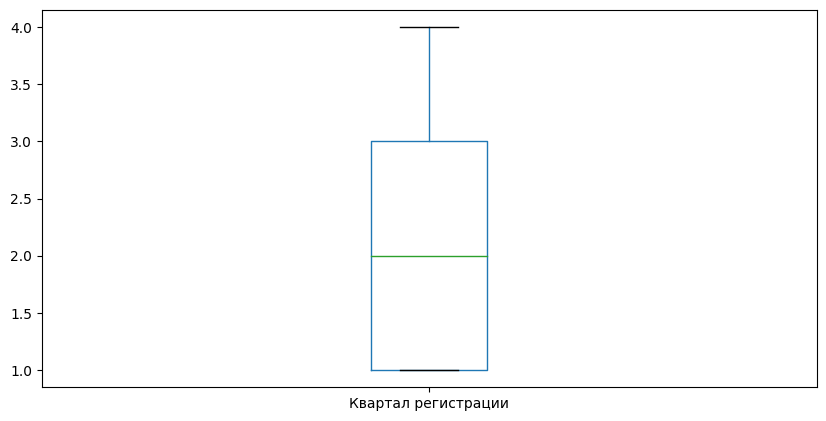

None
Тип объекта


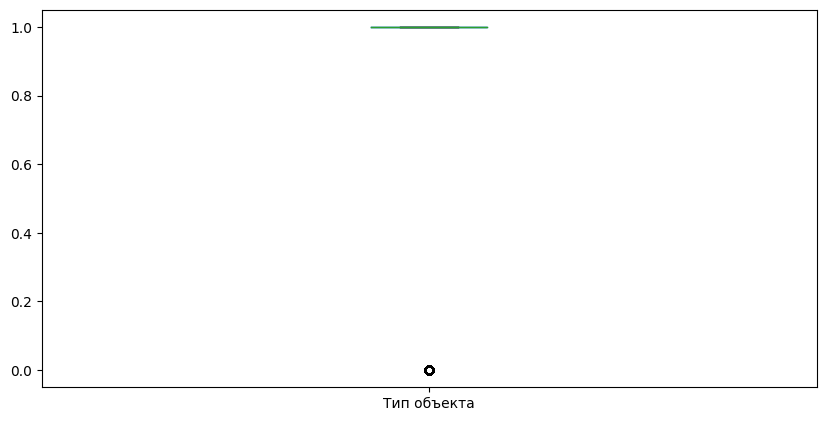

None
Секция


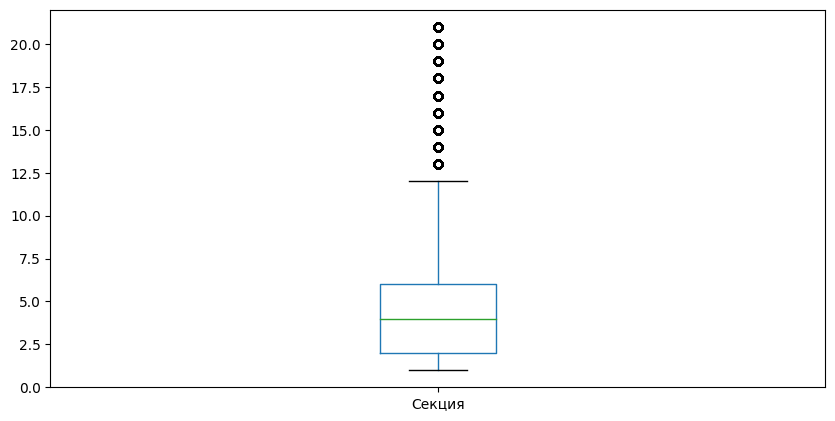

None
Этаж


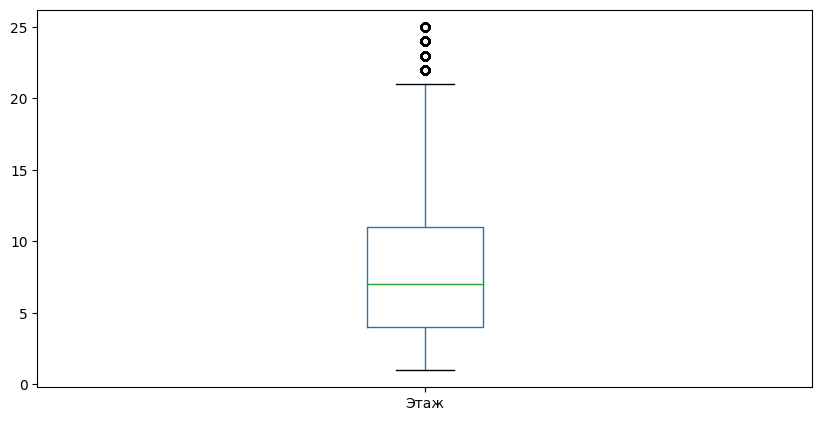

None
Количество комнат


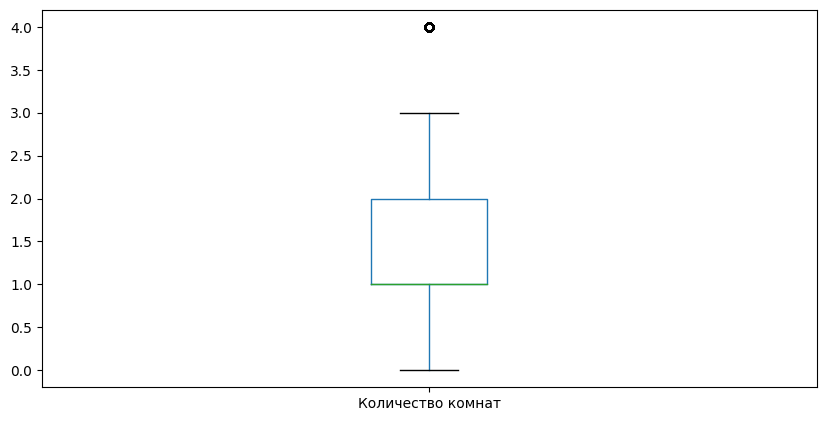

None
Площадь согласно ПД


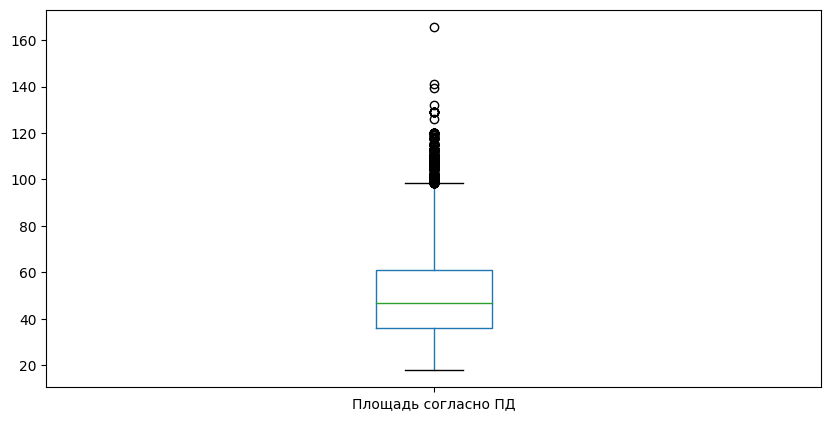

None
Цена за кв. метр


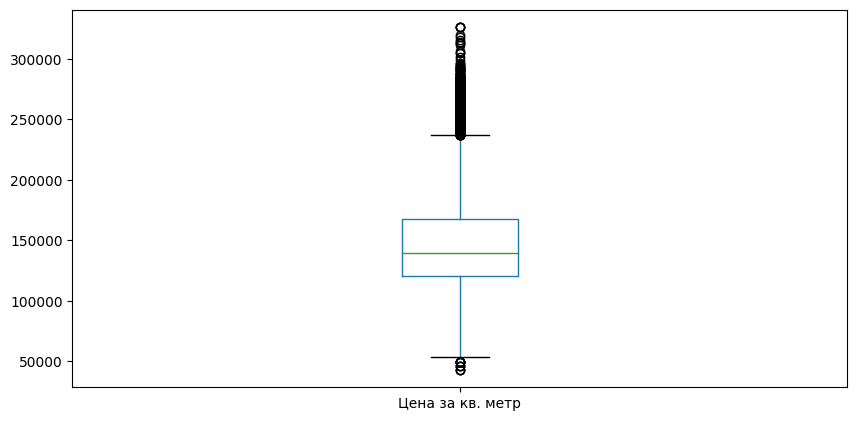

None
Метод определения цены


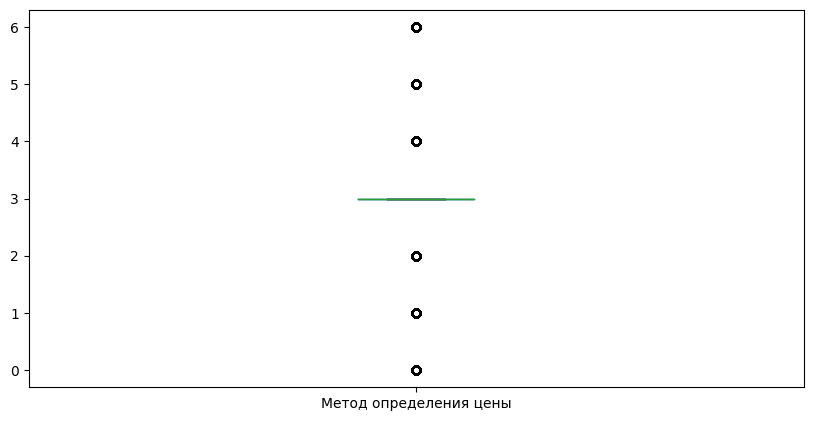

None
Включение скидок/акций в ценообразование


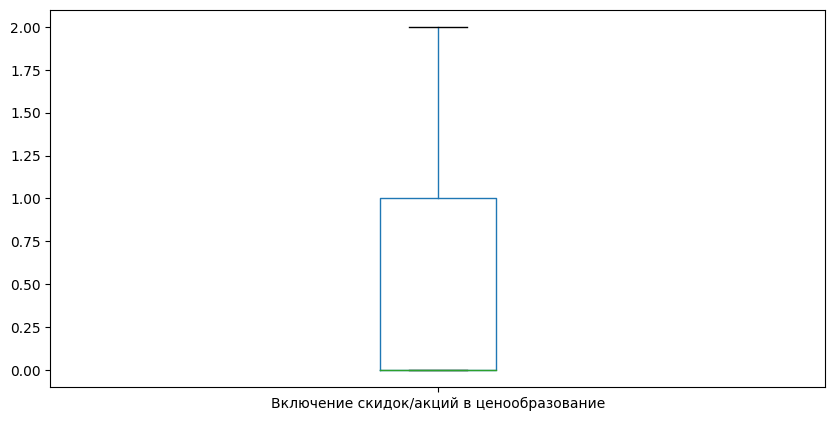

None
Скидки по дате договора


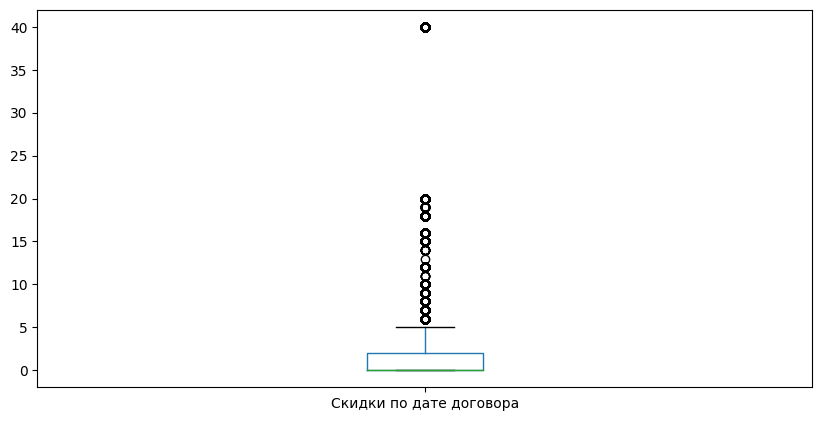

None
Отделка по корпусу


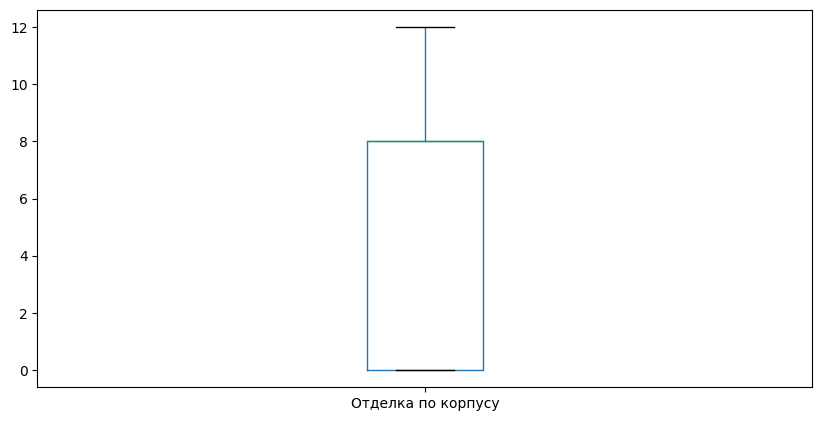

None
Тип продавца


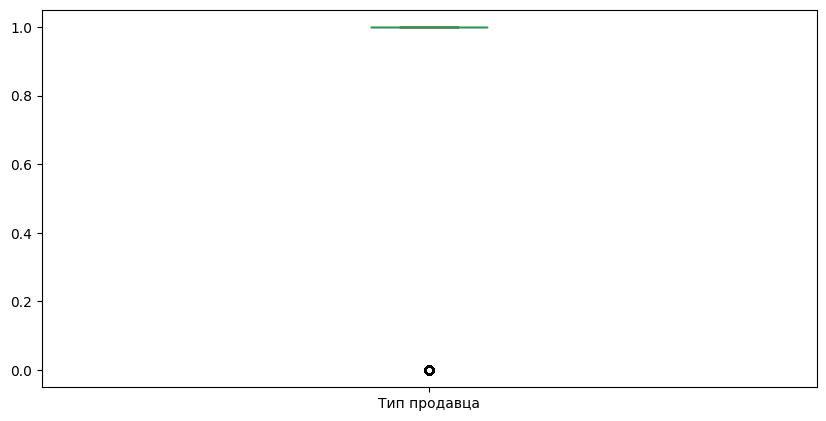

None
Тип покупателя


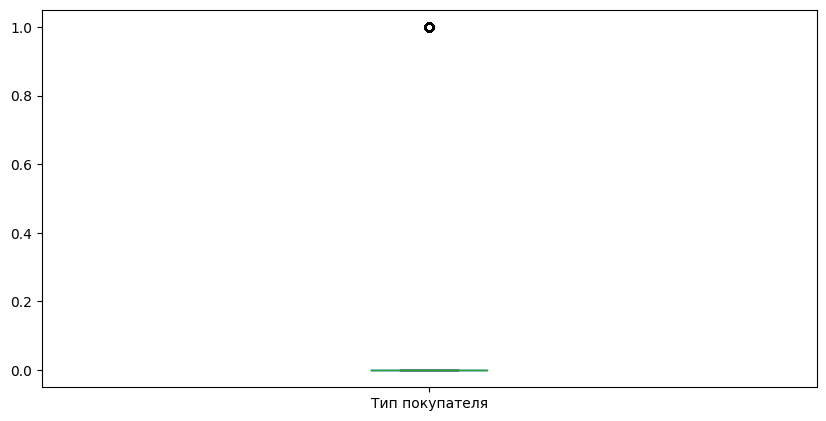

None
Кол-во покупателей


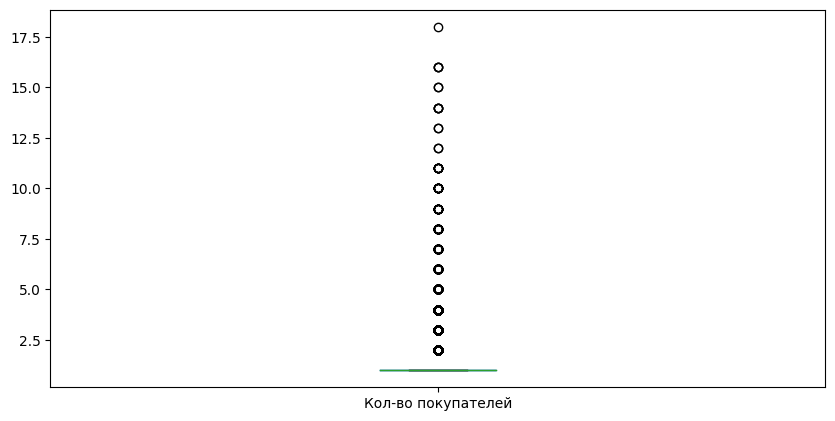

None
Тип ипотеки


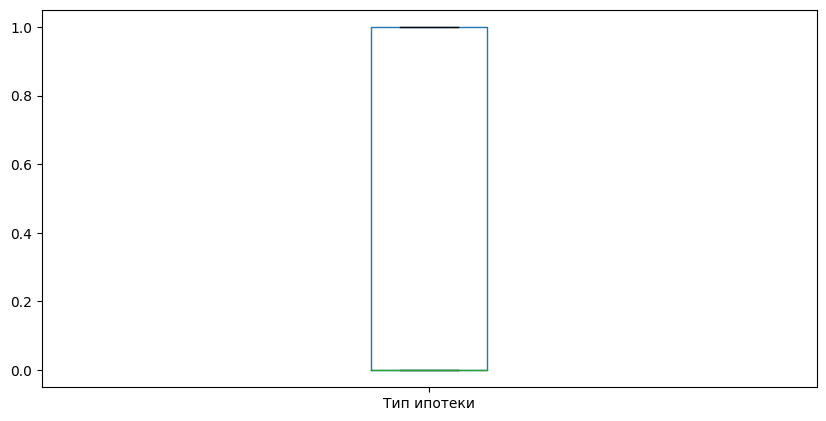

None
Участие объекта в оптовой сделке


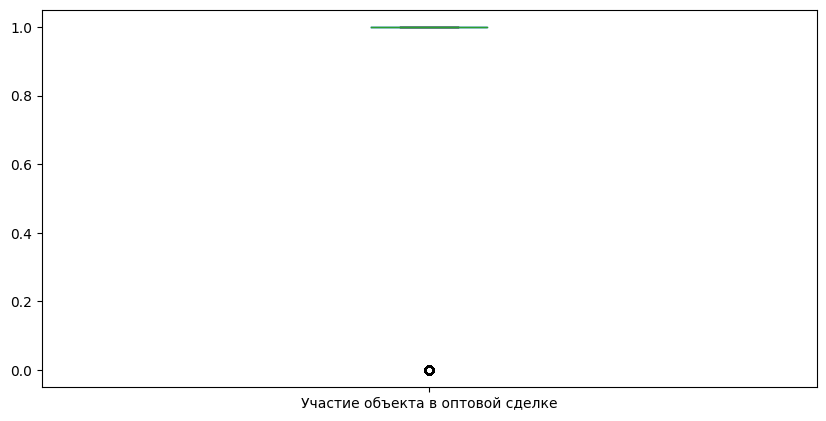

None
Срок в экспозиции до момента сделки, дней


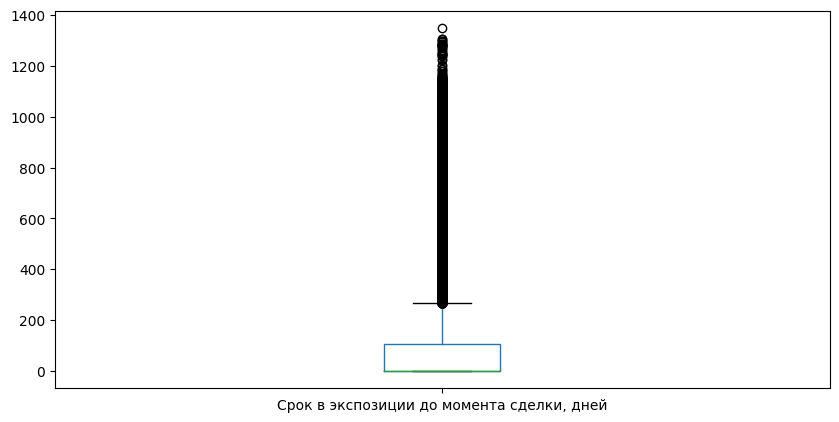

None
Рост цены за 1 кв.м за период экспонирования


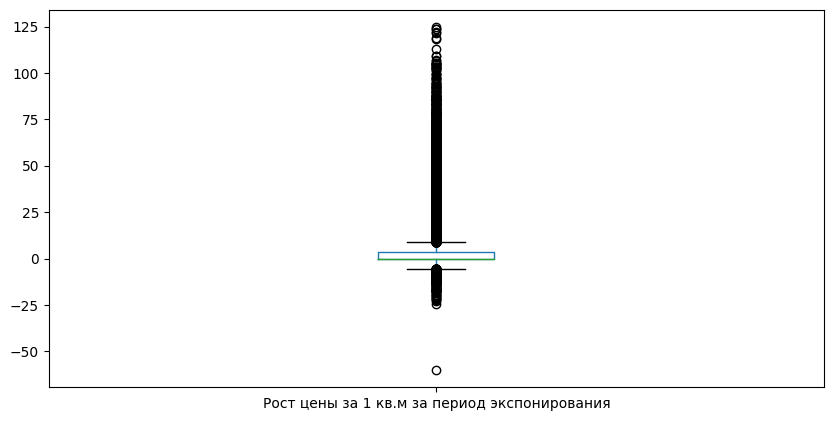

None


In [240]:
for i in df.columns:
    print(i)
    figure(figsize=(10, 5), dpi=100)
#     sns.boxplot(x=i,data=df)
    try:
        df[i].plot.box()
        print(plt.show())
    except:
        pass
    
# vvk@hse.ru

In [243]:
# df = df[df['Кол-во покупателей'] < 5]
len(df)

59346

In [242]:
df.head(3)

,Район,Расстояние до метро,Стадия строительной готовности на дату договора,Срок ввода в эксплуатацию - Старт продаж,Класс,Девелопер,Срок ввода в эксплуатацию - Договор,Квартал договора,Тип сделки,Квартал регистрации,Тип объекта,Секция,Этаж,Количество комнат,Площадь согласно ПД,Цена за кв. метр,Метод определения цены,Включение скидок/акций в ценообразование,Скидки по дате договора,Отделка по корпусу,Тип продавца,Тип покупателя,Кол-во покупателей,Тип ипотеки,Участие объекта в оптовой сделке,"Срок в экспозиции до момента сделки, дней",Рост цены за 1 кв.м за период экспонирования
0,0,15.10,5,1156,1,0,546,1,1,1,1,4,5,0,27.43,95325.34,3,0,12,8,1,0,1,1,1,0,0.0
1,0,0.13,1,821,1,2,546,1,1,2,1,4,11,2,62.60,114000.00,3,0,2,0,1,0,1,1,1,211,7.5
2,0,0.13,1,821,1,2,546,1,1,2,1,13,22,0,24.10,143000.00,3,0,2,0,1,0,3,1,1,211,16.3


In [244]:
df.to_excel('ml.xlsx')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
cols = list(df.columns)
cols.remove('Цена за кв. метр')
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=1, ncols=6)

ax1.violinplot(df['Район'], showmedians=True)
ax2.violinplot(df['Девелопер'], showmedians=True)
ax3.violinplot(df['Площадь согласно ПД'], showmedians=True)
ax4.violinplot(df['Отделка по корпусу'], showmedians=True)
ax5.violinplot(df['Класс'], showmedians=True)
ax6.violinplot(df['Цена за кв. метр'], showmedians=True)


plt.show()

In [ ]:
cor = df.corr()
cor = cor[abs(cor) >= 0.5]
cor = cor[cor != 1.0]
cor.replace(np.nan,0,inplace=True)
cor = cor.drop_duplicates()
for col in cor.columns:
    if len(set(list(cor[col].values))) == 1:
        cor = cor.drop([col], axis=1)
cor.replace(0,np.nan,inplace=True)

In [ ]:
sns.set(font_scale=2)
sns.heatmap(cor, annot=True)
plt.show()